In [1]:
#packages

import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import gaussian_filter

In [27]:
###Ouverture image###
ImageOriginale = plt.imread("images/im_goutte.png")
ImageOriginale = ImageOriginale[:,:,0]
#ImageOriginale = 255 - ImageOriginale # inverser l'image

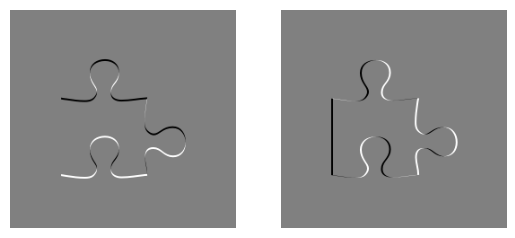

In [28]:
# Affichage du gradient 
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.imshow(np.gradient(ImageOriginale)[0],'gray')
plt.subplot(122)
plt.imshow(np.gradient(ImageOriginale)[1],'gray')
plt.axis('off')
plt.show()

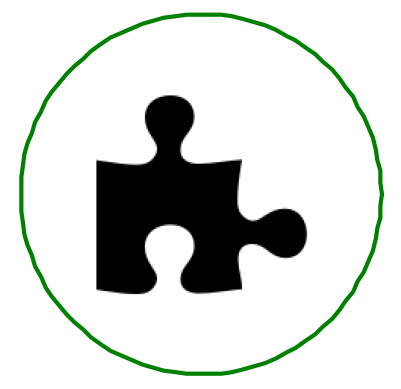

In [29]:
# Initialisation du contour 

lignes = len(ImageOriginale)
colones = len(ImageOriginale[0])

###Parametres###
alpha = 1
beta = 0.5
gamma = 15
################

###Creation du snake###
centre=[int(colones/2),int(lignes/2)]
rayon=min(int((colones-5)/2),int((lignes-5)/2))
K = 100
snakeX = []
snakeY = []
pas = (2*np.pi)/(K-1)
for i in range(K):
    teta = i*pas
    snakeX = np.append(snakeX, int(centre[0] + rayon * np.cos(teta)))
    snakeY = np.append(snakeY, int(centre[1] + rayon * np.sin(teta)))
#######################
plt.figure
plt.imshow(ImageOriginale,'gray')
plt.plot(snakeX, snakeY, 'g', linewidth=3)
plt.axis('off')
plt.show()



In [30]:

###Creation de D2, D4, D et A###
T = 0.1
Mat_Identite = np.identity(K)
D2 = np.roll(Mat_Identite, -1, axis=1) + Mat_Identite*(-2) + np.roll(Mat_Identite,1, axis=1)
D4 = (np.roll(Mat_Identite, -1, axis=1) + np.roll(Mat_Identite,1, axis=1))*-4 + (np.roll(Mat_Identite, -2, axis=1) + np.roll(Mat_Identite,2, axis=1)) + Mat_Identite*(6)
D = alpha*D2 - beta*D4
A = np.linalg.inv(Mat_Identite - T*D)
################################

###Calcul des differents gradient necessaires###
gradY,gradX = np.gradient(ImageOriginale)
gradient = gradX**2 + gradY**2
GradGradY, GradGradX = np.gradient(gradient)
################################################




In [31]:

###Algorithme iteratif###
GradSuivX = np.zeros(snakeX.shape)
GradSuivY = np.zeros(snakeY.shape)
compteur=0
k=0
E_img=0
for i in range(K):
    X = int(snakeX[i])
    Y = int(snakeY[i])
    grad = gradient[Y][X]
    E_img += -gamma * grad
print("energie image initiale", E_img)
Niter = 6000
for compteur in range(Niter) :
    for i in range(K):
        Y=int(snakeY[i])
        X=int(snakeX[i])
        GradSuivX[i] = GradGradX[Y][X]
        GradSuivY[i] = GradGradY[Y][X]
        
    snakeX,snakeY = np.dot(A, snakeX+T*gamma*GradSuivX),np.dot(A, snakeY+T*gamma*GradSuivY)
    if compteur % 1000 == 0 :print(compteur)
    if (compteur == Niter // 3)  : 
        snakeX_tier = snakeX.copy()
        snakeY_tier = snakeY.copy()
    elif (compteur == 2 * (Niter // 3)) : 
        snakeX_tier2 = snakeX.copy()
        snakeY_tier2 = snakeY.copy()

#########################

energie image initiale 0.0
0
1000
2000
3000
4000
5000


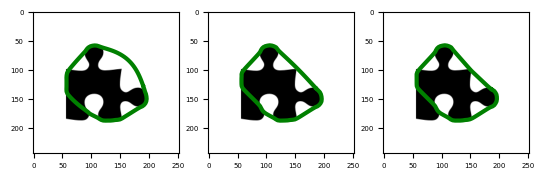

In [32]:
# Affichage du contour finale 

plt.figure()
plt.subplot(131)
plt.imshow(ImageOriginale,'gray')
plt.plot(snakeX_tier, snakeY_tier, 'g', linewidth=3)
plt.tick_params(axis='x', labelsize=5)
plt.tick_params(axis='y', labelsize=5)

plt.subplot(132)
plt.imshow(ImageOriginale,'gray')
plt.plot(snakeX_tier2, snakeY_tier2, 'g', linewidth=3)
plt.tick_params(axis='x', labelsize=5)
plt.tick_params(axis='y', labelsize=5)
plt.subplot(133)
plt.imshow(ImageOriginale,'gray')
plt.plot(snakeX, snakeY, 'g', linewidth=3)
plt.tick_params(axis='x', labelsize=5)
plt.tick_params(axis='y', labelsize=5)
plt.show()

In [11]:
# Energie
E_img=0
for i in range(K):
    X = int(snakeX[i])
    Y = int(snakeY[i])
    grad = gradient[Y][X]
    E_img += -gamma * grad
print("energie image finale", E_img)
##################

energie image finale -497.63616569456644
